<a href="https://colab.research.google.com/github/Tribodee/PYTHON_FOR_VISYALIZATION/blob/main/Project_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
heart_data = pd.read_csv('/content/mushroomsupdated.csv')
# show the first 5 lines of the dataframe
heart_data.head()

In [ ]:
heart_data_x = heart_data.drop('class', axis=1)
heart_data_y = heart_data['class']#Target class

In [ ]:
heart_data_x_encoded = pd.get_dummies(heart_data_x, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(heart_data_x_encoded, heart_data_y, test_size=0.3)#70%,30%

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train)
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)

0.9524200164068909


In [ ]:
from sklearn.tree import DecisionTreeClassifier

best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [2,3,4,5,6]:
        for min_samples_leaf in [5, 10, 20, 30]:
            dtree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            dtree.fit(X_train, y_train)
            predicitions = dtree.predict(X_test)
            acc = accuracy_score(y_test, predicitions)
            if acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                best_acc = acc

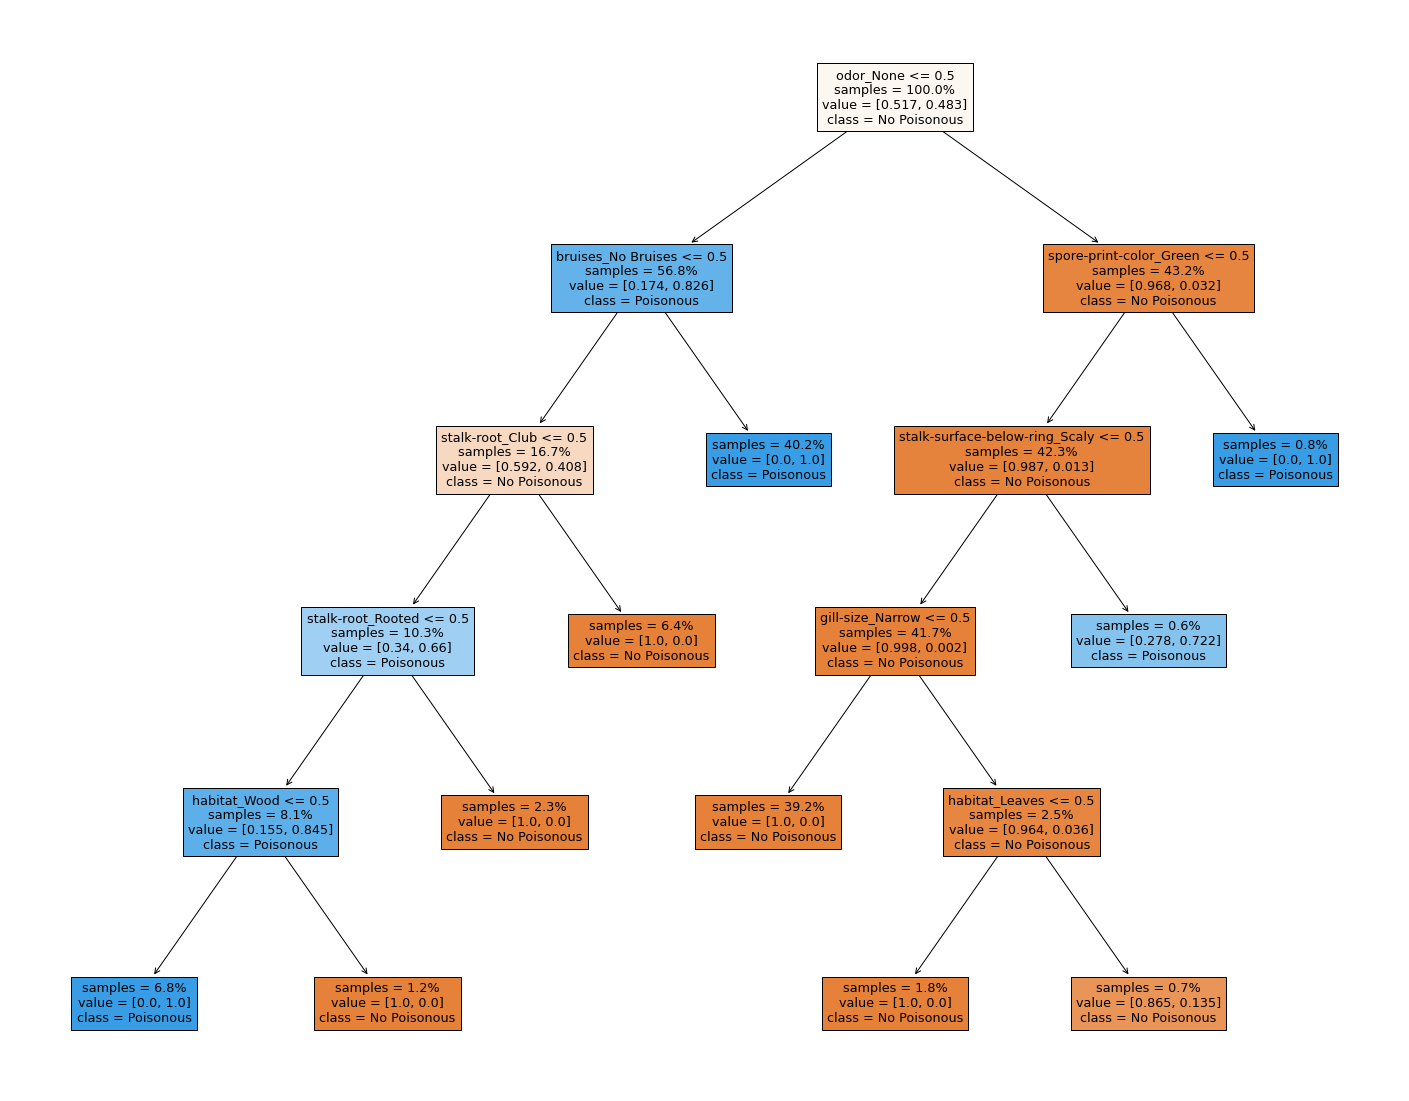

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = heart_data_x_encoded.columns,
            class_names=['No Poisonous', 'Poisonous'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test.png')